In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len(train_labels)

60000

In [7]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

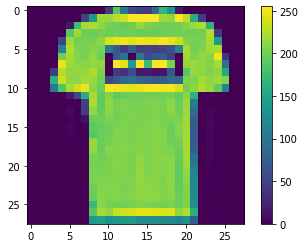

In [8]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0

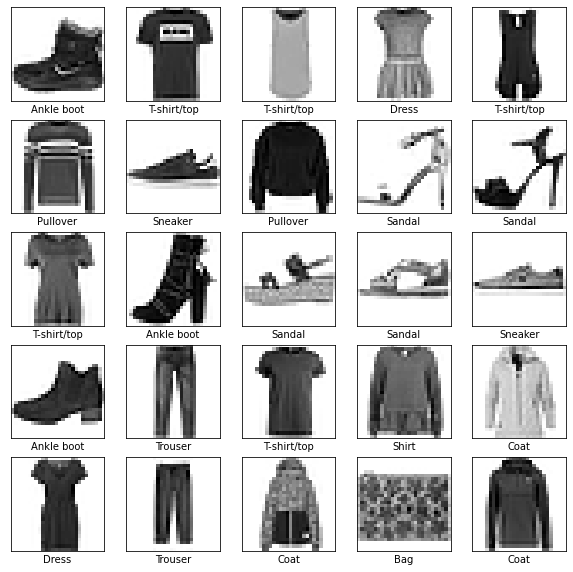

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [11]:
val_images, train_images= train_images[:3000], train_images[3000:] 
val_labels, train_labels = train_labels[:3000], train_labels[3000:]

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [14]:
history = model.fit(train_images
                    ,train_labels
                    ,epochs=10
                    ,batch_size=512
                    ,validation_data=(val_images,val_labels)
                                                                                                                              
                   )

Epoch 1/10
112/112 [==============================] - 2s 13ms/step - loss: 1.0379 - accuracy: 0.6527 - val_loss: 0.4962 - val_accuracy: 0.8320
Epoch 2/10
112/112 [==============================] - 1s 10ms/step - loss: 0.4745 - accuracy: 0.8394 - val_loss: 0.4373 - val_accuracy: 0.8490
Epoch 3/10
112/112 [==============================] - 1s 9ms/step - loss: 0.4192 - accuracy: 0.8561 - val_loss: 0.4344 - val_accuracy: 0.8490
Epoch 4/10
112/112 [==============================] - 1s 9ms/step - loss: 0.3982 - accuracy: 0.8596 - val_loss: 0.4090 - val_accuracy: 0.8510
Epoch 5/10
112/112 [==============================] - 1s 9ms/step - loss: 0.3808 - accuracy: 0.8641 - val_loss: 0.3797 - val_accuracy: 0.8687
Epoch 6/10
112/112 [==============================] - 1s 10ms/step - loss: 0.3493 - accuracy: 0.8757 - val_loss: 0.3694 - val_accuracy: 0.8707
Epoch 7/10
112/112 [==============================] - 1s 9ms/step - loss: 0.3434 - accuracy: 0.8792 - val_loss: 0.3630 - val_accuracy: 0.8733
Epo

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3893 - accuracy: 0.8619

Test accuracy: 0.8618999719619751


In [16]:

history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [17]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

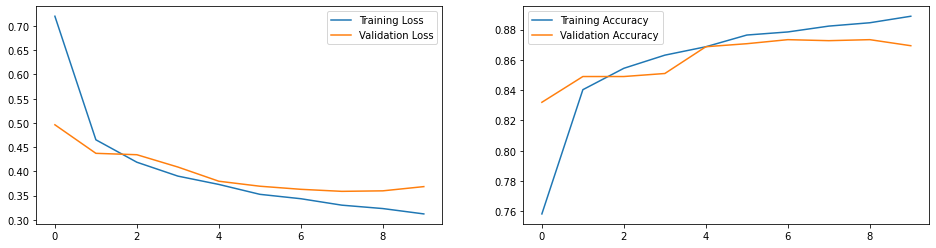

In [18]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [19]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print(val_loss)
print(val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3893 - accuracy: 0.8619
0.3893308639526367
0.8618999719619751


In [20]:
predictions = model.predict(test_images)

In [21]:
print(predictions)

[[ -6.8149505   -8.460928    -4.877477   ...   4.2483096   -0.573642
    6.0217266 ]
 [  2.6708655   -4.1573997   11.616229   ... -19.644522     0.77252203
  -18.981298  ]
 [  2.6479766   13.490317    -0.41663867 ...  -6.2791324   -1.3934693
  -12.353119  ]
 ...
 [  2.5549464   -5.2962527    0.42459294 ...  -4.415185     6.927401
   -9.004853  ]
 [ -1.2723777   10.556036    -1.3989737  ...  -5.2970233   -1.7441671
   -4.889902  ]
 [ -3.2300353   -4.6042457   -3.0191748  ...   2.360795     0.71748257
   -1.8736341 ]]


In [ ]:
pred_classes = np.argmax(model.predict(train_images), axis=-1)
pred_classes

In [23]:
conf_mx = tf.math.confusion_matrix(train_labels, pred_classes)
conf_mx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5212,   12,   72,  200,   18,    2,  147,    1,   54,    0],
       [  17, 5556,    1,   91,    5,    1,    4,    0,    4,    0],
       [  98,   11, 4460,   82,  869,    1,  143,    0,   46,    0],
       [ 150,   55,   27, 5259,  135,    1,   45,    0,   16,    0],
       [  10,    6,  255,  224, 5036,    1,  128,    0,   37,    0],
       [   3,    0,    0,    1,    0, 5447,    1,  217,   12,   19],
       [1113,   14,  543,  191,  738,    0, 3013,    1,   89,    0],
       [   0,    0,    0,    0,    0,   58,    0, 5579,   10,   41],
       [  15,    3,   16,   23,   20,    8,    9,   22, 5597,    0],
       [   0,    2,    0,    0,    0,   60,    0,  382,    7, 5254]],
      dtype=int32)>

In [24]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

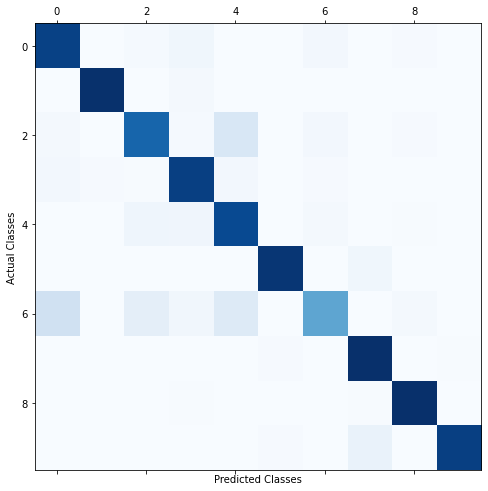

In [25]:
plt.figure(figsize=(16,8))
plt.matshow(conf_mx, cmap=plt.cm.Blues,  fignum=1)
plt.xlabel("Predicted Classes")
plt.ylabel("Actual Classes")
plt.show()